<a href="https://colab.research.google.com/github/iyoushe1703/US-Car-Accidents/blob/master/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory Data Analysis


---


Dataset sourced from [here](https://www.kaggle.com/sobhanmoosavi/us-accidents). 



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install opendatasets --upgrade --quiet

## Data Preparation and Cleaning  
- Load the file using Pandas  
- Look at some information about the file
- Fix any missing or incorrect values

In [ ]:
6c58043434b780894a15454836b658d7

In [ ]:
import opendatasets as od
download_url = "https://www.kaggle.com/sobhanmoosavi/us-accidents"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iyoushe1703
Your Kaggle Key: ··········


  3%|▎         | 10.0M/290M [00:00<00:02, 102MB/s]

100%|██████████| 290M/290M [00:01<00:00, 166MB/s]


In [ ]:
data_filename = "./us-accidents/US_Accidents_Dec20_Updated.csv"

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

#### Percentage of missing values per column

In [ ]:
# returns the count of missing values per column
missing_percent = df.isna().sum() / len(df)
missing_percent.sort_values(ascending = False)

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

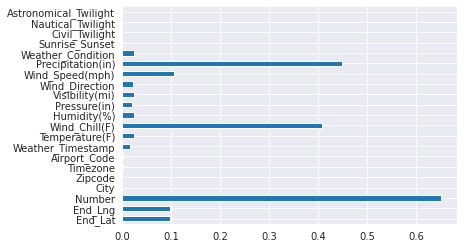

In [ ]:
# missing_percent!=0 is a boolean Series
# here we have used it as an index on missing_percent
missing_percent[missing_percent != 0].plot(kind = 'barh')

## Exploratory Analysis and Visualization  
Columns that I'll analyze:  
- City  
- Start Time
- Start Longitude, Start Latitude
- Temperature
- Weather Condition 


### Analyzing the column `City`
---
Questions that I am looking to answer:
1. 

##### Number of cities in the dataset

In [ ]:
cities = df.City.unique()
len(cities)

11790

#### Number of accidents in a city

In [ ]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
                 ...  
Keshena              1
Bedias               1
Warriors Mark        1
North Star           1
Valliant             1
Name: City, Length: 11789, dtype: int64

###### Here we see that some cities have only one accident reported
###### So, instead of considering all the cities, let's filter for cities with the highest number of accidents.

In [ ]:
cities_by_accidents[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

##### Plotting the cities versus number of accidents

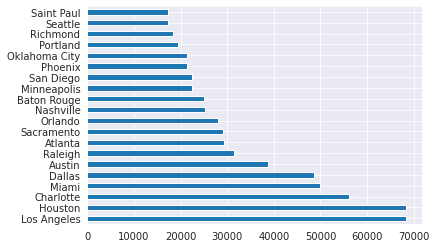

In [ ]:
cities_by_accidents[:20].plot(kind='barh')

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

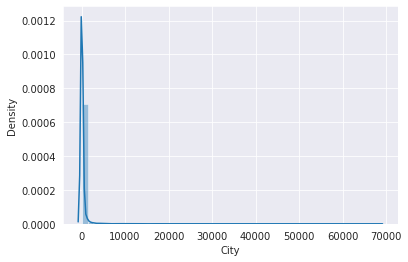

In [ ]:
sns.distplot(cities_by_accidents)

#### Uncovering the distribution of high accident vs low accident cities

In [ ]:
high_accident_cities = cities_by_accidents[cities_by_accidents >= 1000]
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000]

In [ ]:
len(high_accident_cities)/len(cities_by_accidents)

0.04351514123335313

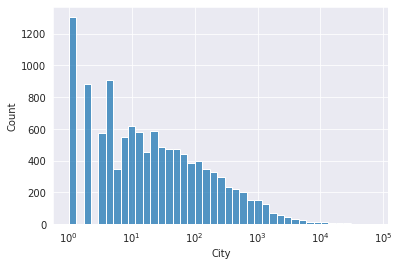

In [ ]:
sns.histplot(cities_by_accidents, log_scale = True)

##### There are some cities that have a very few number of accidents reported.

In [ ]:
cities_by_accidents [cities_by_accidents == 1]

Lukeville            1
Kimberlin Heights    1
Childress            1
Valentines           1
Buckholts            1
                    ..
Keshena              1
Bedias               1
Warriors Mark        1
North Star           1
Valliant             1
Name: City, Length: 1306, dtype: int64

### Analyzing the column `Start_Time`
___  
Some questions that I am looking to answer:  
1. Which months have the most accidents?
2. What time of the day do most accidents happen at?
3. What is the trend of accidents over the years?

#### Analyzing the distribution of accidents over 24 hours

In [ ]:
df.Start_Time

0         2019-05-21 08:29:55
1         2019-10-07 17:43:09
2         2020-12-13 21:53:00
3         2018-04-17 16:51:23
4         2016-08-31 17:40:49
                  ...        
2906605   2018-06-28 08:49:01
2906606   2019-01-10 02:01:01
2906607   2020-11-23 12:52:00
2906608   2019-12-29 22:38:00
2906609   2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: datetime64[ns]

Right now, `df.Start_Time` is of the type `object`. Let us convert it to a `datetime` format.

In [ ]:
# converting the Start Time column to a pandas datetime datatype
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

0         2019-05-21 08:29:55
1         2019-10-07 17:43:09
2         2020-12-13 21:53:00
3         2018-04-17 16:51:23
4         2016-08-31 17:40:49
                  ...        
2906605   2018-06-28 08:49:01
2906606   2019-01-10 02:01:01
2906607   2020-11-23 12:52:00
2906608   2019-12-29 22:38:00
2906609   2018-03-26 13:35:03
Name: Start_Time, Length: 2906610, dtype: datetime64[ns]

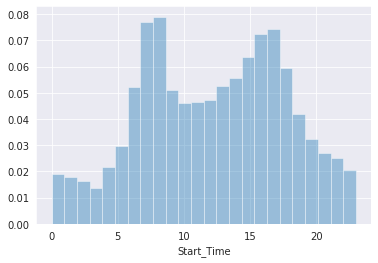

In [ ]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True)

##### Some inferences from the plot above:  
- A high percentage of accidents occur between 6 to 10AM. The reason behind this could be because people commute for work and hence high traffic.
- The accidents peak again at around 3 - 6 PM. This could again be due to people commuting back home from work.

#### Analyzing the distribution over days of the week.

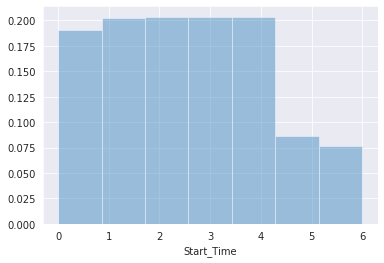

In [ ]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)

On weekends, the number of accidents decreases.  
Is the distribution of accidents by hour the same on weekends as on the weekdays? 

##### Plotting the distribution of accidents on Sundays

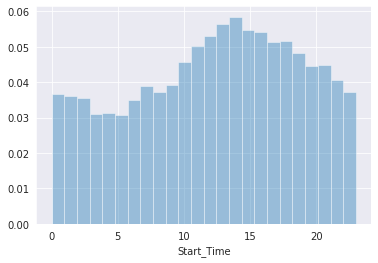

In [ ]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

The accidents peak between 1000 hrs to 0000 hrs

##### Plotting the distribution of accidents on Mondays

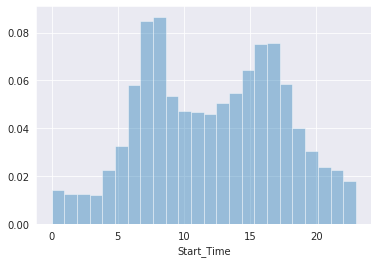

In [ ]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

Looks like a bimodal curve. The accidents seem to peak between 0600 hrs - 0900 hrs and again between 1500 hrs - 1800 hrs.

##### Inferences:  
1. On Sundays
2. Looks like two bell curves, people going to work and people returning from work.

#### Month

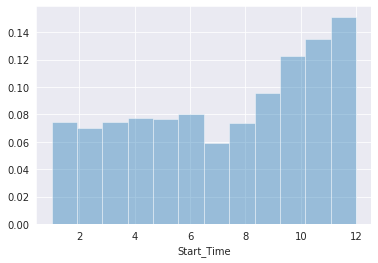

In [ ]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

The accidents start to increase as the year ends.  
This could be due to the festive season towards the end of the year.
Another reason could be accidents due to cold of winter.  

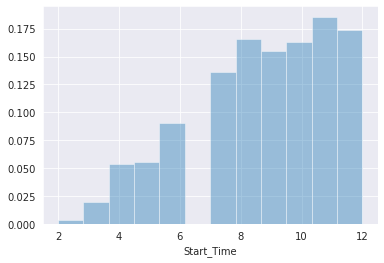

In [ ]:
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

The data for 2016 is not complete, it is a little unreliable. 

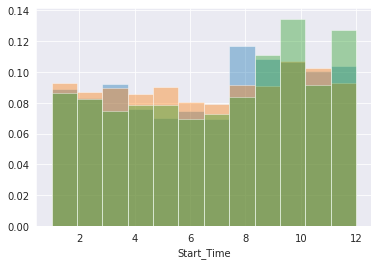

In [ ]:
df_2017 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)


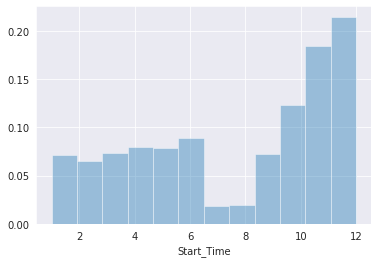

In [ ]:
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

The plot for 2018 and 2019 are pretty uniform.   
But the plot for 2020 is highly skewed towards the right.

### Start Latitude and Longitude

In [ ]:
df.Start_Lat

0          34.808868
1          35.090080
2          37.145730
3          39.110390
4          26.102942
             ...    
2906605    29.813824
2906606    34.068890
2906607    25.702200
2906608    40.660140
2906609    38.831749
Name: Start_Lat, Length: 2906610, dtype: float64

In [ ]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

In [ ]:
# creating a 10% sample
df_sample_10 = df.sample(int(0.1*len(df)))

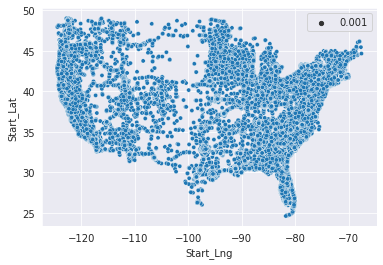

In [ ]:
sns.scatterplot(x=df_sample.Start_Lng, y=df_sample.Start_Lat, size=0.001)

In [ ]:
import folium

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(34.808868, -82.26915699999998)

In [ ]:
from folium.plugins import HeatMap

In [ ]:
df_sample_1 = df.sample(int(0.001*len(df)))
lat_lon_pairs = list(zip(list(df_sample_1.Start_Lat), list(df_sample_1.Start_Lng)))

In [ ]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Questions to be asked and answered  


---



- Are there more accidents in warmer areas than colder areas?  
- Which states have the highest number of accidents? (per capita)   
- Does NYC show up in the data? If not, why doesn't it show up in the list of top cities by accident inspite of having the highest population. 
- Among the top 100 cities in number of accidents, which states do they belong to most frequently.
- What time of the day are accidents most frequent in? - ANSWERED
- Which days of the week have the most accidents?
- Which months have the most accidents?
- What is the trend of accidents year over year (decreasing/increasing?)
- When is accidents per unit of traffic the highest?

## Summary and Conclusion  
---


- no data for New York
- Number of accidents per city decreases/increases exponentially

- less than 5% of cities have more than 1000 accidents  
- Over 1300 cities have just 1 accident reported